<h1><center>Introduction</center></h1>

   Data below contains attrition information of 1,740 employees within a company. Using a machine learning package, combined with logistic regression, this project will try to develop a formula that would predict the probability of a randomly selected employee leaving his/her position within the company in the near future.
   
   [Employee attrition data](https://www.ibm.com/communities/analytics/watson-analytics-blog/hr-employee-attrition/) 
    


<h1><center>Initiate and import packages</center></h1>


In [165]:
import pandas as pd 
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 1500)
import numpy as np
from scipy import stats, special
from sklearn import metrics, datasets, feature_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, Normalizer, MaxAbsScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from seaborn import pairplot, heatmap
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline



 <h1><center>Import the data</center></h1>

In [114]:
df = pd.read_excel('employee_attrition.xlsx') #did not change the downloaded file name
df.head(10) #display first 10 rows of information



,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


 <h1><center>Data cleaning and preparation</center></h1>

In [115]:
df.shape  #(1470, 35)

len(df['EmployeeNumber'].unique()) #1470 unique employee numbers, can be used as index. No information overlap/errors

df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [117]:
#Select all numeric columns
colnames_numerics_only = df.select_dtypes(include=np.number).columns.tolist()
df_numeric = df[colnames_numerics_only]

#Select all categorical columns
colnames_categorical_only = df.select_dtypes(exclude=np.number).columns.tolist()
df_categorical = df[colnames_categorical_only]

#Encode categorical columns
df_categorical_encoded = pd.get_dummies(df_categorical)

#Select n-1 per category to drop manually
columns_to_drop = ['Attrition_No','BusinessTravel_Non-Travel','Department_Sales','Department_Human Resources','Department_Research & Development','EducationField_Other', 'Gender_Female',
                   'JobRole_Sales Representative','MaritalStatus_Single','Over18_Y','OverTime_No']

#Drop columns
df_categorical_encoded.drop(columns =columns_to_drop, inplace = True)
df_categorical_encoded

#Combine numerical and dummy encoded dfs
df = pd.concat([df_categorical_encoded,df_numeric], axis=1)
df

,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Technical Degree,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,MaritalStatus_Divorced,MaritalStatus_Married,OverTime_Yes,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2
5,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,32,1005,2,2,1,8,4,79,3,1,4,3068,11864,0,13,3,3,80,0,8,2,2,7,7,3,6
6,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,59,1324,3,3,1,10,3,81,4,1,1,2670,9964,4,20,4,1,80,3,12,3,2,1,0,0,0
7,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,30,1358,24,1,1,11,4,67,3,1,3,2693,13335,1,22,4,2,80,1,1,2,3,1,0,0,0
8,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,38,216,23,3,1,12,4,44,2,3,3,9526,8787,0,21,4,2,80,0,10,2,3,9,7,1,8
9,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,36,1299,27,3,1,13,3,94,3,2,3,5237,16577,6,13,3,2,80,2,17,3,2,7,7,7,7


In [118]:
#Remove data that might falsly correlate
df.pop('EmployeeNumber')

#Remove Age
df.pop('Age') #Since we have information for the total working years of an individual(I'm assuming total resume years, not just company years),
#we can remove Age. The correlation between Age and TotalWorkingYears is 0.6803805357911985, and I will use TotalWorkingYears instead. 

#Make sure no NaN values are present in the database
len(df.dropna()) #Nothing was dropped, length is still 1470 rows


1470

In [119]:
                                #Identify correlating values
columnx = []
columny = [] #Separating column to x and y for correlation matrix
for x in df:
    columnx.append(str(x))
    columny.append(str(x))
    for y in df:
        if pd.Series(columny).isin(pd.Series(y)).all() == False: #making sure no repeating results appear
            if pd.Series(columnx).isin(pd.Series(y)).any() == False: # making sure no transposposed results appear
                try:
                    p = stats.pearsonr(df[x],df[y]) #displays correlation and p scores
                    if abs(p[0]) > .6  and abs(p[0]) < .99 and abs(p[1]) < .05:
                        print(f'{x} and {y} have a correlation score of {round(p[0], 5)} and p-value of {round(p[1], 10)}')                   
                except TypeError: #handles error when the values in column are not numeric
                    pass
    #


C:\Users\Albert\Anaconda3\lib\site-packages\scipy\stats\stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
C:\Users\Albert\Anaconda3\lib\site-packages\scipy\stats\stats.py:5256: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


BusinessTravel_Travel_Frequently and BusinessTravel_Travel_Rarely have a correlation score of -0.75309 and p-value of 0.0
JobRole_Manager and MonthlyIncome have a correlation score of 0.61957 and p-value of 0.0
JobLevel and MonthlyIncome have a correlation score of 0.9503 and p-value of 0.0
JobLevel and TotalWorkingYears have a correlation score of 0.78221 and p-value of 0.0
MonthlyIncome and TotalWorkingYears have a correlation score of 0.77289 and p-value of 0.0
PercentSalaryHike and PerformanceRating have a correlation score of 0.77355 and p-value of 0.0
TotalWorkingYears and YearsAtCompany have a correlation score of 0.62813 and p-value of 0.0
YearsAtCompany and YearsInCurrentRole have a correlation score of 0.75875 and p-value of 0.0
YearsAtCompany and YearsSinceLastPromotion have a correlation score of 0.61841 and p-value of 0.0
YearsAtCompany and YearsWithCurrManager have a correlation score of 0.76921 and p-value of 0.0
YearsInCurrentRole and YearsWithCurrManager have a correla

In [120]:
df.pop('JobLevel') #JobLevel has a 95% positive correlation with MonthlyIncome. I am removing JobLevel, because I am assuming
#salalry is more important to an employee than rank. An entry level employee would gladly accept an executive pay grade, 
#but an executive or ceo is less likely to accept their jobs at minimum wage.
df.pop('YearsAtCompany') #I already chose TotalWorkingYears over Age, and since this information is similar and positively
#correlated with TotalWorkingYears, therefore, I am dropping YearsAtCompany. In addition, we have YearsInCUrrentRole -- which would overlap.#Correlation = 51%
df.pop('YearsWithCurrManager') #Since YearsInCurrentRole is positively correlated with YearsWithCurrManager, I am removing
#YearsWithCurrManager. Correlation = 71%
df.pop('PercentSalaryHike') #PerformanceRating has a 77% positive correlation with PercentSalaryHike. I am also, eliminating
#performance rating due to high possibility of bias when supervisors were evaluating the employees. Some of the issues 
# might include personal relationships(bias), rating inflation/deflation, different criteria within a department, etc. The bias might 
#have transferred to PercentSalaryHike, which I will test with df.groupby('Department').agg('mean'). If the mean of the hike
#for departments is within a reasonable range, then the bias might be evenly distributed. 
#Another issue that arises is the possible capping of raises, the raises might have been purposely leveled at a specific  
#average due to budget constraints.
        #df.groupby('Department').agg('mean')
            # The groups are Human Resources, Research & Development and Sales. The means for PercentSalaryHike are
            #14.7619,  15.2913, and  15.0964 respectively. Looks like the overall company budget for raises was 15% 
            #current budget.
            
            #To verify, I looked at the overall mean of PercentSalaryHike :df['PercentSalaryHike'].mean()
            #Result: 15.209523809523809, which confirms the possibility that hikes might have purposefully leveled at 15%.

            ###*****I returned to PerformanceRating and found the average employee rating for the three previously mentioned
            #departments (Human Resources, Research & Development and Sales), which were 3.14, 3.16, and 3.14 respectively.
            #There is a chance the company had a policy of controlling grade inflation/deflation, and the score average
            #maintained within a specific threshhold.
df.pop('StandardHours') #Everyone in the company has 80 hours
df.pop('EmployeeCount') #Has a value of 1 in every row
df.pop('BusinessTravel_Travel_Rarely') # Has a high negative correlation With frequesnt Business Travel
df.pop('TotalWorkingYears') #Has a high positive correlation with MonthlyIncome

#Identify  remaining correlating values
columnx = [] 
columny = [] #Separating columns to x and y for correlation matrix
for x in df:
    columnx.append(str(x))
    columny.append(str(x))
    for y in df:
        if pd.Series(columny).isin(pd.Series(y)).all() == False: #making sure no repeating results appear
            if pd.Series(columnx).isin(pd.Series(y)).any() == False: # making sure no transposposed results appear
                try :
                    p = stats.pearsonr(df[x],df[y]) #displays correlation and p scores
                    if abs(p[0]) > .5  and abs(p[0]) < .99 and p[1] < .05 :
                        print(f'{x} and {y} have a correlation score of {round(p[0], 5)} and p-value of {round(p[1], 10)}')
               
                except TypeError: #handles error when the values in column are not numeric
                    pass

                #Reuslts = MonthlyIncome and TotalWorkingYears have a correlation score of 0.77289 and p-value of 0.0
                        #YearsInCurrentRole and YearsSinceLastPromotion have a correlation score of 0.54806 and p-value of 0.0

                    #I am keeping the correlated data above, because I belive it will be valuable regardless of their high correlation values.
df = pd.DataFrame(df)                    

EducationField_Human Resources and JobRole_Human Resources have a correlation score of 0.54975 and p-value of 0.0
EducationField_Life Sciences and EducationField_Medical have a correlation score of -0.56877 and p-value of 0.0
JobRole_Manager and MonthlyIncome have a correlation score of 0.61957 and p-value of 0.0
YearsInCurrentRole and YearsSinceLastPromotion have a correlation score of 0.54806 and p-value of 0.0


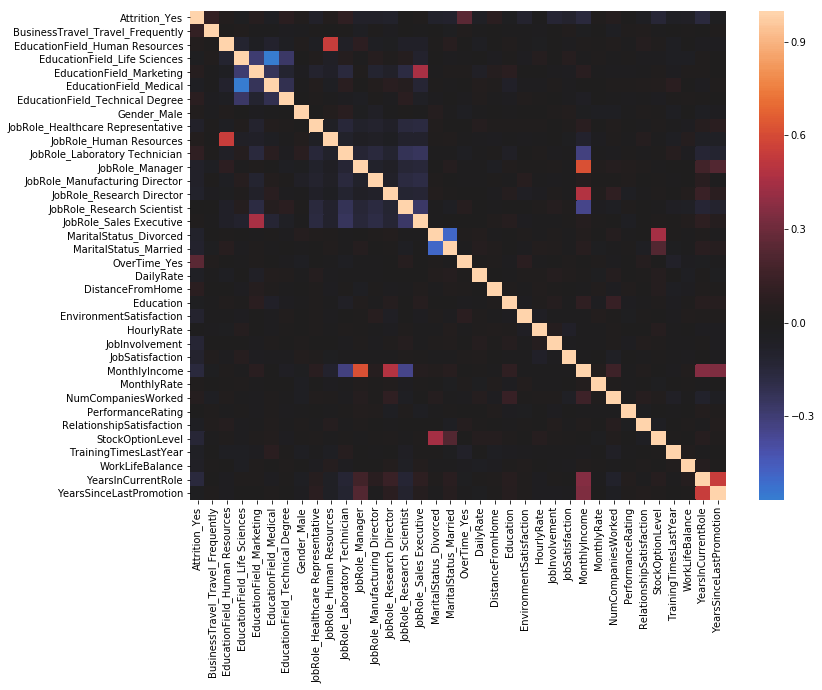

In [121]:
plt.figure(figsize=(12, 9))
sns.heatmap(df.corr(), center = 0)

 <h1><center>Parameter Tuning</center></h1>

In [122]:
len(df) #total amount of rows

1470

In [123]:
#Define X and y

y = df['Attrition_Yes']
X = df.drop('Attrition_Yes', axis = 1)

<h3><center>KNN <h3><center>

In [124]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [125]:
def knn_parameter_tuning(X,y):
    """Input X, y for the best parameters for knn model with test size of .3, stratified data, cv 5, random seed 77, and MinMaxScaler"""
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .3, random_state = 77, stratify = y)

    knnsteps = [('scaler',MinMaxScaler()),
            ('knn',KNeighborsClassifier())]

    knnpipeline = Pipeline(knnsteps)


    knnparameters = {'knn__n_neighbors':np.arange(1,50,1),
                  'knn__weights': ['uniform','distance'],
                  'knn__algorithm': ['ball_tree','kd_tree','brute'],
                  'knn__p':[1,2]
                  }

    knncv = GridSearchCV(knnpipeline, param_grid = knnparameters, cv = 5, verbose = 0, n_jobs= -1)

    knncv.fit(X_train, y_train)

    y_predict = knncv.predict(X_test)
    print(f'Best parameters are {knncv.best_params_}, model\'s score is {knncv.score(X_test, y_test)}')
    print(metrics.classification_report(y_test, y_predict))

In [126]:
knn_parameter_tuning(X,y)

Help on function knn_parameter_tuning in module __main__:

knn_parameter_tuning(X, y)
    Input X, y for the best parameters for knn model with test size of .3, stratified data, cv 5, random seed 77, and MinMaxScaler

Best parameters are {'knn__algorithm': 'ball_tree', 'knn__n_neighbors': 10, 'knn__p': 1, 'knn__weights': 'distance'}, model's score is 0.8458049886621315
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       370
           1       0.64      0.10      0.17        71

   micro avg       0.85      0.85      0.85       441
   macro avg       0.74      0.54      0.54       441
weighted avg       0.82      0.85      0.80       441



C:\Users\Albert\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


<h3><center>RandomForestClassifier <h3><center>

In [127]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [140]:
def rfc_parameter_tuning(X,y):
    """Input X, y for the best parameters for rfc model with test size of .3, stratified data, cv 5, random seed 77"""
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .3, random_state = 77, stratify = y)

    rfc = RandomForestClassifier()

    rfcparameters = {'n_estimators':np.arange(100,500,50),
                  'criterion': ['gini','entropy'],
                  'min_samples_split': np.arange(2,10,1),
                  'max_depth': np.arange(1,15,1)
                  }

    rfccv = GridSearchCV(rfc, param_grid = rfcparameters, cv = 5, verbose = 0, n_jobs= -1)

    rfccv.fit(X_train, y_train)

    y_predict = rfccv.predict(X_test)
    print(f'Best parameters are {rfccv.best_params_}, model\'s score is {rfccv.score(X_test, y_test)}')
    print(metrics.classification_report(y_test, y_predict))

In [141]:
rfc_parameter_tuning(X,y)

Best parameters are {'criterion': 'gini', 'max_depth': 13, 'min_samples_split': 2, 'n_estimators': 150}, model's score is 0.8526077097505669
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       370
           1       0.88      0.10      0.18        71

   micro avg       0.85      0.85      0.85       441
   macro avg       0.86      0.55      0.55       441
weighted avg       0.86      0.85      0.80       441



<h3><center>Logistic Regression <h3><center>

In [143]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [163]:
def lr_parameter_tuning(X,y):
    """Input X, y for the best parameters for logistic regression model with test size of .3, stratified data, cv 5, random seed 77, and MinMaxScaler"""
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .3, random_state = 77, stratify = y)

    lrsteps = [('scaler',MinMaxScaler()),
            ('lr',LogisticRegression())]

    lrpipeline = Pipeline(lrsteps)


    lrparameters = {'lr__solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
                  }

    lrcv = GridSearchCV(lrpipeline, param_grid = lrparameters, cv = 5, verbose = 0, n_jobs= -1)

    lrcv.fit(X_train, y_train)

    y_predict = lrcv.predict(X_test)
    print(f'Best parameters are {lrcv.best_params_}, model\'s score is {lrcv.score(X_test, y_test)}')
    print(metrics.classification_report(y_test, y_predict))

In [164]:
lr_parameter_tuning(X,y)

Best parameters are {'lr__solver': 'newton-cg'}, model's score is 0.8684807256235828
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       370
           1       0.71      0.31      0.43        71

   micro avg       0.87      0.87      0.87       441
   macro avg       0.80      0.64      0.68       441
weighted avg       0.85      0.87      0.85       441



C:\Users\Albert\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


<h3><center>GradientBoostingClassifier <h3><center>

In [169]:
GradientBoostingClassifier().get_params()

{'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [170]:
def gbc_parameter_tuning(X,y):
    """Input X, y for the best parameters for rfc model with test size of .3, stratified data, cv 5, random seed 77"""
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .3, random_state = 77, stratify = y)

    gbc = GradientBoostingClassifier()


    gbcparameters = {'loss': ['deviance', 'exponential'],
                     'n_estimators':np.arange(50,500,50),
                     'max_depth': np.arange(1,20,1)

                  }

    gbccv = GridSearchCV(gbc, param_grid = gbcparameters, cv = 5, verbose = 0, n_jobs= -1)

    gbccv.fit(X_train, y_train)

    y_predict = gbccv.predict(X_test)
    print(f'Best parameters are {gbccv.best_params_}, model\'s score is {gbccv.score(X_test, y_test)}')
    print(metrics.classification_report(y_test, y_predict))

In [171]:
gbc_parameter_tuning(X,y)

Best parameters are {'loss': 'deviance', 'max_depth': 1, 'n_estimators': 300}, model's score is 0.8684807256235828
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       370
           1       0.72      0.30      0.42        71

   micro avg       0.87      0.87      0.87       441
   macro avg       0.80      0.64      0.67       441
weighted avg       0.85      0.87      0.84       441

